# Data cleaning for question 2: Can a Larger Production Budget Improve Domestic and Worldwide Gross Profits?

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import dataframe from csv file using pd.read_csv function and review dataframe

In [2]:
#importing cvs file and saving it under variables
movie_budgets_df = pd.read_csv('/Users/Gabby/Flatiron/project_1/dsc-phase-1-project-online/zippedData/tn.movie_budgets.csv')

In [3]:
#reviewing the movie_budgets_df
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#checking for duplicates
duplicates = movie_budgets_df[movie_budgets_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [5]:
#reviewing basic statistcs of each column in dataframe
movie_budgets_df.describe(include = 'all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5782,5782,5782
unique,NaN,2418,5698,509,5164,5356
top,NaN,"Dec 31, 2014",Home,"$20,000,000",$0,$0
freq,NaN,24,3,231,548,367
mean,50.372363,NaN,NaN,NaN,NaN,NaN
std,28.821076,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN
75%,75.000000,NaN,NaN,NaN,NaN,NaN


*Nan values displayed in object columns.*

In [6]:
#reviewing movie_budgets_df
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


*Columns with currency values are shown in this dataframe as objects. They need to be changed to integers so statistical analysis can be performed.*

In [7]:
#checking for Nan values in each column of dataframe
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

*No Nan values.*

## Change the currency columns from strings to integers by creating a function

In [8]:
def change_currency_int(col):
    return col.str.replace("$","").str.replace(",","").astype(int)

*The change_currency_int() function eliminates punctuation from the currency columns and then converts them into the integer datatype.*

In [9]:
movie_budgets_df['production_budget'] = change_currency_int(movie_budgets_df['production_budget'])

In [10]:
movie_budgets_df['domestic_gross'] = change_currency_int(movie_budgets_df['domestic_gross'])

In [11]:
movie_budgets_df['worldwide_gross'] = change_currency_int(movie_budgets_df['worldwide_gross'])

In [12]:
#use .head() method to look at values of currency columns 
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


*Currency columns no longer shows $ or commas.*

In [13]:
#use .info() method to confirm currency columns have changed value
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


*Before, production_budget, domestic_gross, and worldwide_gross were objects. They have been successfully converted them to integers by using the change_currency_int function.*

In [14]:
#reviewing basic statistcs of each column in dataframe
movie_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


## Perform more statistical analysis on the dataframe with the .cov( ) and .corr( ) methods

*Use the covariance method .cov() to determine how the currency columns vary together.*
* **positive covariance** = positive relationship
* **negative covariance** = inverse relationship
* **covariance equal to or close to 0** = no linear relationship

In [15]:
movie_budgets_df.cov()

,id,production_budget,domestic_gross,worldwide_gross
id,8.306544e+02,-4.251289e+07,1.623512e+07,-4.744745e+07
production_budget,-4.251289e+07,1.748250e+15,1.956443e+15,5.466678e+15
domestic_gross,1.623512e+07,1.956443e+15,4.656779e+15,1.119394e+16
worldwide_gross,-4.744745e+07,5.466678e+15,1.119394e+16,3.052707e+16


*Use the correlation method .corr() to determine the relationship/association of between the currenct columns*
* **If two variables have a correlation of +0.9**: the change in one item results in a similar change to another item
* **If two variables have a correlation of -0.9**: the change in one variable results in an opposite change in the other variable.
* **If two variables have a correlation near 0**: there would be no effect

In [16]:
movie_budgets_df.corr()

,id,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.035278,0.008255,-0.009422
production_budget,-0.035278,1.000000,0.685682,0.748306
domestic_gross,0.008255,0.685682,1.000000,0.938853
worldwide_gross,-0.009422,0.748306,0.938853,1.000000


## Plot scatter plot graphs using Seaborn

[Text(0.5, 1.0, 'Movie Production Budget vs. Domestic Gross'),
 Text(0.5, 0, 'Movie Production Budget'),
 Text(0, 0.5, 'Domestic Gross')]

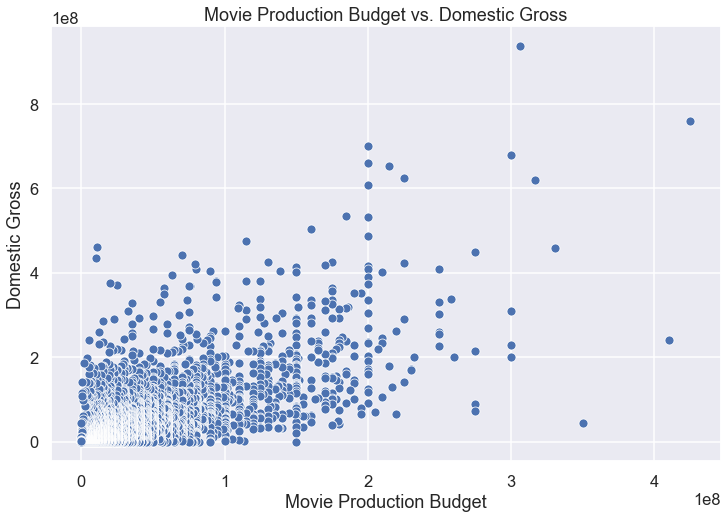

In [17]:
sns.set(style='darkgrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize = (12, 8))
ax = budget_vs_dom_gross_plot = sns.scatterplot(data = movie_budgets_df, x = 'production_budget', y = 'domestic_gross', ax=ax )
ax.set(title = 'Movie Production Budget vs. Domestic Gross',
       xlabel = 'Movie Production Budget',
       ylabel = 'Domestic Gross')

[Text(0.5, 1.0, 'Movie Production Budget vs. Worldwide Gross'),
 Text(0.5, 0, 'Movie Production Budget'),
 Text(0, 0.5, 'Worldwide Gross')]

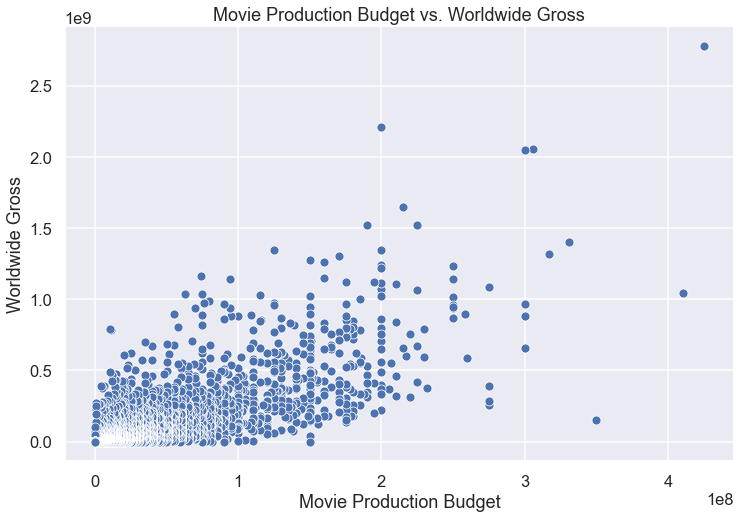

In [21]:
fig, ax2 = plt.subplots(figsize = (12, 8))
ax2 = budget_vs_ww_gross_plot = sns.scatterplot(data = movie_budgets_df, x = 'production_budget', y = 'worldwide_gross')
ax2.set(title = 'Movie Production Budget vs. Worldwide Gross',
       xlabel = 'Movie Production Budget',
       ylabel = 'Worldwide Gross')

[Text(0.5, 1.0, 'Domestic Gross vs. Worldwide Gross'),
 Text(0.5, 0, 'DomesticGross'),
 Text(0, 0.5, 'Worldwide Gross')]

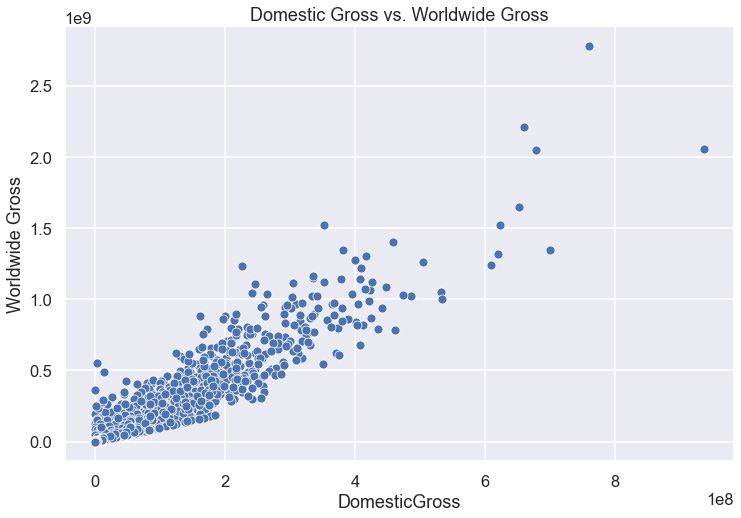

In [22]:
fig, ax3 = plt.subplots(figsize = (12, 8))
ax3 = dom_vs_ww_gross_plot = sns.scatterplot(data = movie_budgets_df, x = 'domestic_gross', y = 'worldwide_gross')
ax3.set(title = 'Domestic Gross vs. Worldwide Gross',
       xlabel = 'DomesticGross',
       ylabel = 'Worldwide Gross')